In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import SimpleSetting, NewsSimulationSetting, NewsSimulationSetting2, ConstantsSetting
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

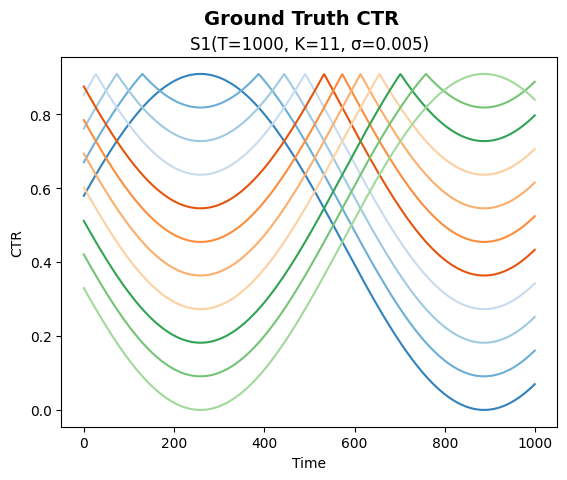

In [7]:
s1 = SimpleSetting(
    SettingConfig(1000, 11),
    evolution_speed=0.005
)
s1.visualize()

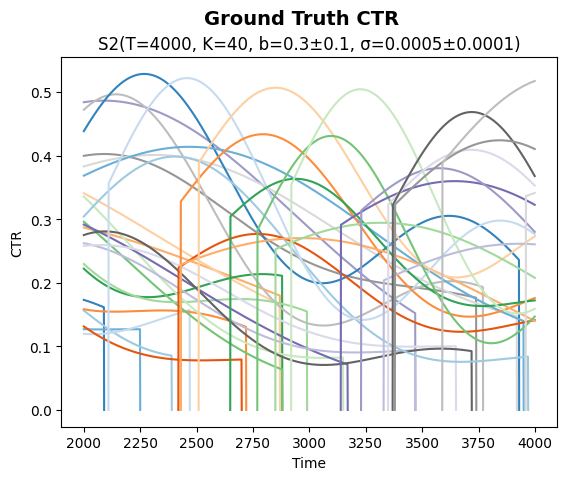

In [4]:
s2 = NewsSimulationSetting(
    SettingConfig(4000, 40),
    lifetime=2000
)
s2.visualize(tmin=2000)

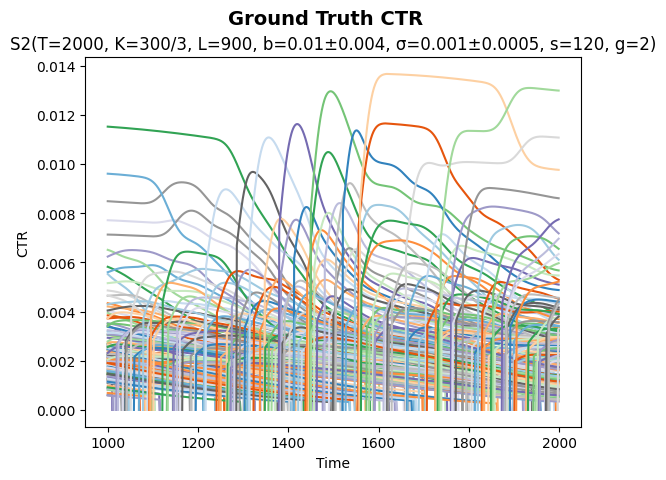

In [5]:
s3 = NewsSimulationSetting2(
    SettingConfig(
        episode_count=2000, 
        item_count=300, 
        k=3, 
        episode_length=1
    ),
    lifetime=900,
    ctr_base=0.01,
    ctr_fuzz=0.004,
    sigma_base=0.001,
    sigma_fuzz=0.0005,
    smoothing=120,
    global_evolution=2,
)
s3.visualize(tmin=1000)

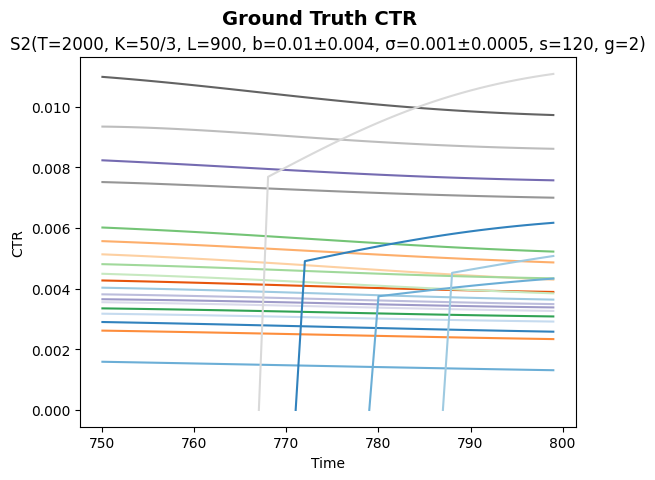

In [11]:
s4 = NewsSimulationSetting2(
    SettingConfig(
        episode_count=2000, 
        item_count=50, 
        k=3, 
        episode_length=1
    ),
    lifetime=900,
    ctr_base=0.01,
    ctr_fuzz=0.004,
    sigma_base=0.001,
    sigma_fuzz=0.0005,
    smoothing=120,
    global_evolution=2
)
s4.visualize(tmin=750, tmax=800)

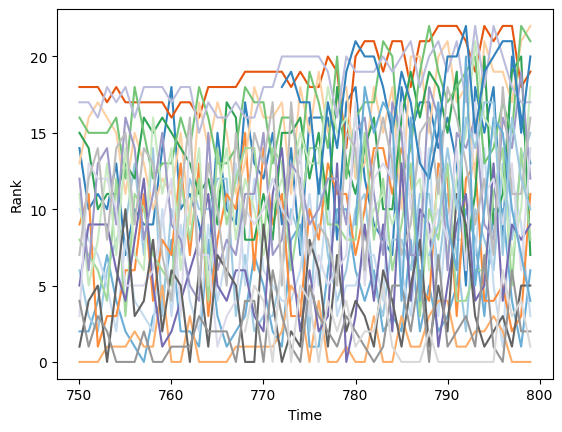

In [17]:
s4.plot_extra_info(noise=3, tmin=750, tmax=800)

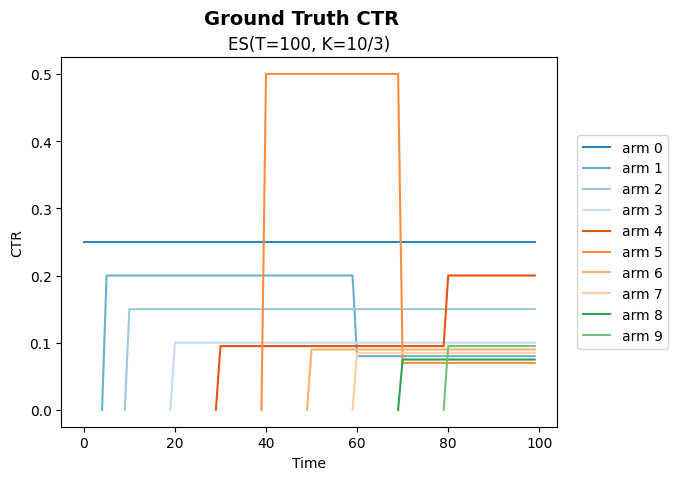

In [8]:
ctr = 0.05
events = {
    0: {0: 5*ctr},
    5: {1: 4*ctr},
    10: {2: 3*ctr},
    20: {3: 2*ctr},
    30: {4: 1.9*ctr},
    40: {5: 10*ctr},
    50: {6: 1.8*ctr},
    60: {7: 1.7*ctr, 1: 1.6*ctr},
    70: {8: 1.5*ctr, 5: 1.4*ctr},
    80: {9: 1.9*ctr, 4: 4*ctr}
}
setting = ConstantsSetting(
    SettingConfig(
        episode_count=100, 
        item_count=10, 
        k=3, 
        episode_length=1
    ),
    events=events
)
setting.visualize()

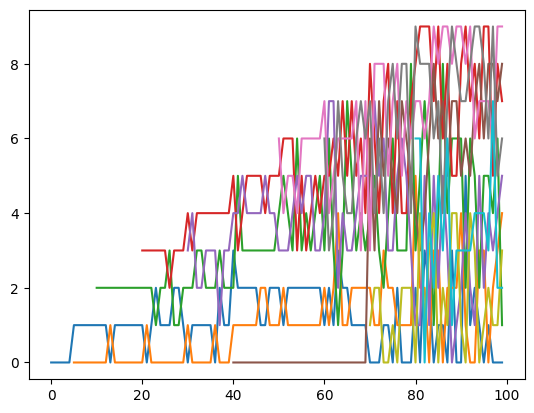

In [11]:
ctrs = setting.get_aux_info()
for i in range(ctrs.shape[1]):
    s, e = setting.valid_ranges[i]
    y = ctrs[:, i].astype(float)
    y[:s] = np.nan
    if e is not None:
        y[e:] = np.nan
    plt.plot(y)

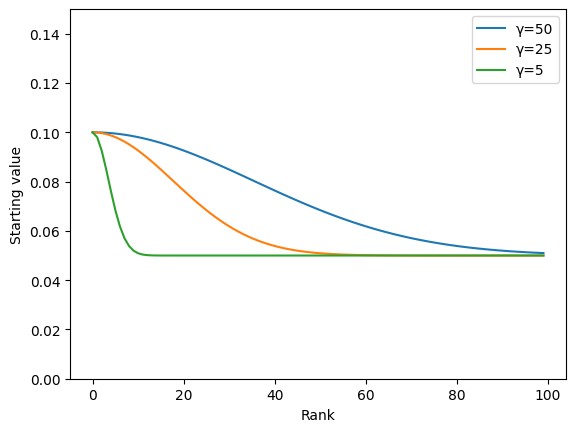

In [5]:
def plot_starting_value(t, q0=0.05, q1=0.1):
    x = np.arange(100)
    # y = q1 + (q0-q1)/(1+np.exp(a*(t-x)))
    y = q0 + (q1-q0)*np.exp(-np.power(x/t, 2))
    plt.plot(x, y, label=f"γ={t}")
    plt.xlabel('Rank')
    plt.ylabel('Starting value')
    plt.legend()
    plt.ylim(0, 0.15)
    
plot_starting_value(50)
plot_starting_value(25)
plot_starting_value(5)

In [4]:
a = np.array([1, 2, 3])
a*np.power(2, a)

array([ 2,  8, 24])